<a href="https://colab.research.google.com/github/tanishkaa31/Parkinson/blob/main/parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/drive/My Drive/projekt/parkinsons.data")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(195, 24)

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
del df['name']   #data without the first column
target = df['status']  #separating the target columns
del df['status']  #data without the target columns

In [ ]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( df, target, test_size = 0.2)

In [ ]:
x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
164,102.273,142.830,85.902,0.00907,0.000090,0.00493,0.00461,0.01480,0.02814,0.272,0.01579,0.01553,0.02073,0.04736,0.03882,18.447,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233
64,229.401,252.221,221.156,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,0.00769,0.00957,0.01016,0.02308,0.00300,26.415,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
137,113.166,130.270,100.673,0.00502,0.000040,0.00257,0.00312,0.00772,0.05279,0.476,0.02896,0.03347,0.04134,0.08689,0.03690,16.747,0.625362,0.708617,-4.654894,0.304107,2.672362,0.274387
184,116.848,217.552,99.503,0.00531,0.000050,0.00260,0.00346,0.00780,0.01795,0.163,0.00810,0.01144,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
152,198.116,233.099,174.478,0.02714,0.000140,0.01568,0.01699,0.04705,0.08684,1.018,0.04284,0.05556,0.08318,0.12851,0.16265,9.449,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [ ]:
y_train.head()

164    1
64     0
137    1
184    0
152    1
Name: status, dtype: int64

In [ ]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

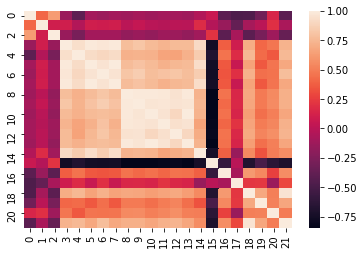

In [ ]:
import seaborn as sn
sn.heatmap(pd.DataFrame(x_train).corr(), annot=False)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

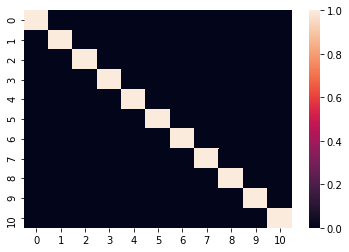

In [ ]:
sn.heatmap(pd.DataFrame(x_train).corr(), annot=False)
plt.show()

In [ ]:
x_train.shape

(156, 11)

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(10, activation="tanh", name="layer1", input_shape=(x_train.shape[1],), kernel_regularizer='l1_l2'),
        layers.Dense(7, activation="tanh", name="layer2", kernel_regularizer='l1_l2'),
 #       layers.Dense(4, activation="tanh", name="layer3", kernel_regularizer='l1_l2'),
        layers.Dense(4, activation="tanh", name="layer4", kernel_regularizer='l1_l2'),
        layers.Dense(1, activation="sigmoid", name="layer5", kernel_regularizer='l1_l2'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10)                120       
_________________________________________________________________
layer2 (Dense)               (None, 7)                 77        
_________________________________________________________________
layer4 (Dense)               (None, 4)                 32        
_________________________________________________________________
layer5 (Dense)               (None, 1)                 5         
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
optimizer = keras.optimizers.Adam(lr=0.009)
bce = tf.keras.losses.BinaryCrossentropy()
cce = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=bce, metrics=["accuracy"], )
history=model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test), batch_size=34)

Epoch 1/20
5/5 [==============================] - 0s 39ms/step - loss: 1.4925 - accuracy: 0.5833 - val_loss: 1.3553 - val_accuracy: 0.7949
Epoch 2/20
5/5 [==============================] - 0s 6ms/step - loss: 1.2681 - accuracy: 0.8269 - val_loss: 1.1930 - val_accuracy: 0.8205
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 1.1141 - accuracy: 0.8397 - val_loss: 1.0667 - val_accuracy: 0.8205
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.9978 - accuracy: 0.8526 - val_loss: 0.9737 - val_accuracy: 0.8205
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.9123 - accuracy: 0.8590 - val_loss: 0.9025 - val_accuracy: 0.8205
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.8449 - accuracy: 0.8654 - val_loss: 0.8457 - val_accuracy: 0.8205
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7906 - accuracy: 0.8590 - val_loss: 0.7951 - val_accuracy: 0.8205
Epoch 8/20
5/5 [=================

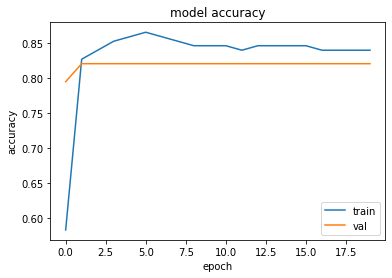

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

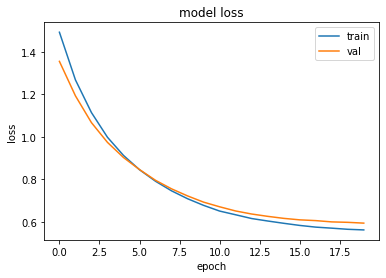

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()